In [2]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
# Extract the Data of rate of fuel Consumption in Nigeria
data = pd.read_csv("/home/zubrah/Downloads/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# create an area of focus
data = data[["ENGINESIZE", "CO2EMISSIONS"]]

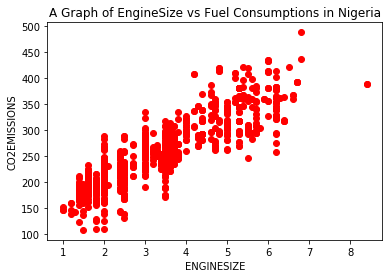

In [5]:
plt.scatter(data["ENGINESIZE"], data["CO2EMISSIONS"] , color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("A Graph of EngineSize vs Fuel Consumptions in Nigeria")
plt.show()

In [7]:
#categorize the data into train and test
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [8]:
# perform a linear regression using scikit learn model
regr = linear_model.LinearRegression()
train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x , train_y)

#coefficients
print("The coefficient is :", regr.coef_) #Slope
print("The intercept of the data is : ", regr.intercept_) #Intercept

The coefficient is : [[38.79512384]]
The intercept of the data is :  [127.16989951]


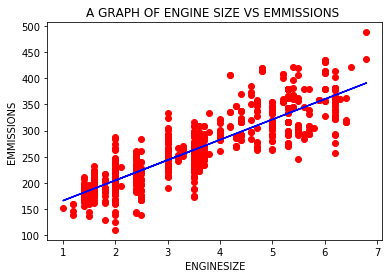

In [9]:
# Plotting the regression line:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color= 'red')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-b')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMMISSIONS")
plt.title("A GRAPH OF ENGINE SIZE VS EMMISSIONS ")
plt.show()

In [11]:
# Predicting values:
# Function for predicting future values 
def get_regression_predictions(input_features, intercept, slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

In [12]:
# Predicting emission for future car:
my_engine_size = 15.0
estimated_emission = get_regression_predictions(my_engine_size, regr.intercept_[0], regr.coef_[0][0])
print("Estimated Emission size is : ", estimated_emission)


Estimated Emission size is :  709.0967570496674


In [17]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[["ENGINESIZE"]])
test_y = np.array(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)
print("Mean absolute error : %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares(MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score : %.2f" %r2_score(test_y_ , test_y))

Mean absolute error : 20.60
Mean sum of squares(MSE): 746.45
R2-score : 0.71
